<a href="https://colab.research.google.com/github/Aksh002/Data_Analatics_Course_Notes/blob/main/DS__Course7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Week 1
import pandas as pd
url="..."
#df=pd.read_csv(url)
#apply this only when csv has header row, if not,pass another argument "header=none"
df=pd.read_csv(url,header=None)


#df.prints - prints alll the rows
df.head() #Prints first n rows of dataset where df.head(n)
#df.tail(n) - prints last n rows of the dataset

#default header will be intigers here
#To replace default header-
headers=[" "," ", " ",...]
df.columns=headers

#To save the progress anytime by saving modified dataset\Exporting a pandas dataframe to csv-
path="C:\Windows\..\automobile.csv" #automobile.csv will be the saved file name
df.to_csv(path) #Converts live dataframe to csv

#all these can be applied to different file formats

#data types
df.dtypes
#This will give u datatypes of all the columns
#Here we see if our data hv some anomalies or not, like sm column should hv numeric values but the data input is of object type, later we hv to deal with these mismatches

#DESCRIBE
df.describe()
#To get the statistical summary of the data
#This helps to analyze if any mathimatical issues may exist, like extreme outliers or large diviations.
df.describe(include="all")
#This will return the stastical summary of all the rows,includeing one with object data type too.It will show 'NaN(Not a Number)'for them.We will also see some new set of statistical terms like-
          # Unique - No. of ditinct obj in the column
          # top- most frequently occuring value
          # freq - freq of top value

df.info()
#consize summarise the information about the DataFrame's index, column data types, non-null values, and memory usage

            #DB API
#Connection methods
.cursor() #returns a new cursor obj using connections
.commit() #commit any pending transaction to the database
.rollback() #roll back the database to any pending transaction
.close() #close a db connection

            #Writting code using DB API
from dmodule import connect
#Create connection object
connection=connect('database','username','pswd')
#create a cursor object
cursor=connection.cursor()
#Run queries
cursor.execute("select * from mytable")
results=cursor.fetchall()
#Free resources
cursor.close()
connection.close()
#Its imp to close connections to avoid unused connection taking up space


#
df1=df.replace('?',np.NaN)
#Here we r creating another variable to store the version of dataset where "?" is replaced by NaN(from numpy package) so that dropna() can remove the missing values:
df=df1.dropna(subset=["price"],axis=0)
#This will drop/delete all the entire rows who has no price mentioned.Here, axis=0 means that the contents along the entire row will be dropped wherever the entity 'price' is found to be NaN.Now, you have successfully read the raw data set and added the correct headers into the data frame.

print(df.columns) #or df.columns
#print name of all the colmns

df.replace("?",np.NaN,inplace=True)
#This will replace the ? with NaN in the the same dataframe only bcs of inplace being True, by default its False

In [ ]:
#Week 2       DATA PRE-PROCESSING

#         Missing values

# To find if thers any missing values or not
df.replace('?', np.nan, inplace = True)
df.isnull().values.any()      # Returns true/false

#  to print all the rows with null values
df.replace('?', np.nan, inplace = True)
df[df.isnull().values.any(axis=1)]

# To add 1 to each data in a column
df["symboling"]=df["symboling"]+1

#To implement operation on a column
df.dropna(subset=["<column name>"],inplace=True,axis=0)
# axis=0 drop the entire row
# axis=1 drop the entire column
# inplace rewrites the changes into current df

#NOTE- This axis notation and values are universal i guess
#      Same is with inplace argument

df.replace(missing value,new_value)
# replace missing values
# eg- df1=df.replace('?',np.NaN)

# replacing with mean
mean=df["normalised-losses"].mean()
df["normalised-losses"].replace(np.NaN,mean)



#           Data formatting

# To convert "mpg" version to "L/100km" in car dataset
df["city-mpg"]=235/df["city-mpg"]
df.rename(columns={"city-mpg : city-L/100km"},inplace=True)

# Incorrect datatypes
# In the current dataframe, datatype of price assigned object, which is wrong
df["price"]=df["price"].astype("int")
#This is used to convert datatype

#           Data Normalisation

# Methods-
#         simple feature scaling
#         min-max
#         z-factor

# Simple feature scaling
df["length"]=df["length"]/df["length"].max()

# Min-Max
df["length"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())

# Z factor
df["length"]=(df["length"]-df["length"].mean())/df["length"].std()

#           Binning

# To create three bins(high,medium,low) for price feature, we need 4 numbers as dividers that r equal distance appart
bins=np.linspace(min(df["price"]),max(df["price"]),4)
# Here we use numpy fxn lin space to return the array bins containing 4 equally spaced numbers over the interval of price
group_names=["Low","Medium","High"]
# This a list of bin names
df["price-binned"]=pd.cut(df["price"],bins,label=group_names,include_lowest=True)
# Here we use a panda fxn cut to segment and sort the datavalues into bins acc to bins array and label all the rows accordingly
# We can then plot histograms over count X price bins and get the insights

#            Categorical -> Numerical

# Dummy variables in python pandas
dummy_variable=pd.get_dummies(df["fuel"])
df=pd.concat([df,dummy_variable],axis=1)
# It concatinate two dataframes about column

#Replace the missing values of the data set attribute with the MODE common occurring entry in the column.
MostFrequentEntry = df['attribute_name'].value_counts().idxmax()
df['attribute_name'].replace(np.nan,MostFrequentEntry,inplace=True)

#.astype('data_type') is used to change the datatype

# Change the label name of a dataframe column
df.rename(columns={'old_name':\'new_name'}, inplace=True)


In [ ]:
# Week 3                        Exploratory Data analysis

df.describe()

#Value_counts
drive_wheels_counts=df["drive-wheels"].value_counts()
# This summarise the catogorical data using value_counts method, abt like how many times each vakue appeared in the feature
# Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

df['drive-wheels'].value_counts().to_frame()
# convert the series to a dataframe

drive_wheels_counts.rename(columns={"drive-wheels":"value-counts"},inplace=True)
# drive_wheels_counts.columns=['value-wtf'] (this works)

drive_wheels_counts.index.name="drive-wheels"
# Here we rename the coloumn containg count as value-count and add the index name for type of values occured in drive-wheels(which r fwd,rwd,4wd)

#                   Data Visualisation

# Box plots
import seaborn as sns
sns.boxplot(x="drive-wheels",y="price",data=df)
# This will plot a box plot for data
# One thing could be observe here that box plot distribution for rwd and 4wd is almost identical

#Scatter plot
import matplotlib.pyplot as plt
x=df["engine-size"]
y=df["price"]
plt.scatter(x,y)
#This will display a scatter plot of price wrt engine size
plt.title("Scatterploy of Engine size VS Price")
plt.xlabel1("Engine size")
plt.ylabel1("Price")
#Adding tittle n label is good practice
#What we can observe from this plot is engine size and price do somewhat hv a positive linear relationship

#                     Grouping data
df.groupby()
# a pandas method used for grouping
#       can be applied to categorical variables
#       group data in categories
#       Single or multiple variables
# Eg- If we wanna see the dependency of avg pricing on the variables like "drive wheels" and "body-style"
df_test=df[["drive-wheels","body-style","price"]]
# First we pick out the three variables we r intrested in
df_grp=df_test.groupby(["drive-wheels","body-style"],as_index=False)
df_grp
#as_index = This is a boolean value that specifies whether to return the grouped columns as index in the resulting DataFrame. Default is True.
# Data is ow grouped in sub categories.A rows goes like - "0 - 4wd - hatchback - 7603.000000".  The table that will appear now will not be much helpfull and hard to visualise on graph apart from telling that which type of car has higher value in market.
# To make this table to understand and visualise we will convert this table into "PIVOT TABLE" using pivot method.
df_pivot=df_grp.pivot(index="drive-wheels",columns="body-style")
# This will give a table like excel sheet where each row is for special value of drive-wheels and each column has 1 special value of body_style assigned to it
# NOTE - Btw The pivot() function is used to reshape a DataFrame, but it cannot be directly applied to a grouped DataFrame, If you have grouped your DataFrame using groupby() and then intend to reshape it, you should first apply an aggregation function (like sum(), mean(), etc.) to the grouped data to convert it back to a DataFrame, and then use pivot()
# Like we can do another thing- we can take mean price of each unique value of drive-wheels and body style combination
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1
# THis will create a table of mean price of each possible combination of drive-wheels and body-type (probabaly 12 rows(prev it was as the no of rows of databse))
df_pivot=grouped_test1.pivot(index="drive-wheels",columns="body-style")
# Now applying pivot fxn will work properly

df['drive-wheels'].unique()
# To print out all the unique values of a feature

# Heatmap -
# Great way to know the effect of multiple variables on target variable
# Used for pivot table
plt.pcolour(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()
# Here we use pcolour method of pyplot to plot heat map of red n blue scale
# Each drive wheels is numbered on the Y axis as it was index before, while each body-style is numbered along X axis.Colour saturation varies acc to colour bar


#           DATA VISUALISATIONS
#               Matplotlib

from matplotlib import pyplot as plt
# or
import matplotlib.pyplot as plt
# "%matplotlib inline" this command is required to display graph in notebook itself (only for jupiter notebook)

# Matplotlib fxns -

# Standard line plot
plt.plot(x,y)
# X = independent variable . Y = dependent variable

# Scatter plot
plt.scatter(x,y)
# other arguments possible -
#    c: This sets the color of the markers
#    etc,....

# Histogram
plt.hist(x,bins,edgecolor)
# X = variable to binned  .  Y = number of elements in each bin
# Edge colour is very imp, makes every bin seperate
# Bins = intervals into which the data will be divided. a sequence of bin edges (including the rightmost edge), or a string indicating a method for calculating the number of bins (e.g., 'auto', 'sturges', 'fd', 'doane', 'scott', 'rice', 'sqrt'). If not provided, defaults to 10.
# Other args -
#       range: This specifies the range of the bins. It can be a tuple '(min, max)' indicating the minimum and maximum values of the bins. If not provided, the range is determined by the minimum and maximum values of the data.
#       density: boolean value,specifies whether to normalize the histogram so that the area under the histogram sums to 1. If True, the histogram represents a "probability density function". Default is False.
#       color: This specifies the color of the bars in the histogram

# Bar plot
# Its to visualise categorical data
plt.bar(x,hieght,width)
# Height is the no. of values belonging to the category . X - categorical data . width - helps to adjust width of the bins

# Pseudo Color plot
plt.pcolor(c,cmap)
# cmap defines the colour scheme of the plot


# Seaborn
import seaborn as sns

# Seaborn fxns -

# Regression plot -
# Scatter plot with line of regression model
sns.regplot(x='engine size',y='prices',data=df)

# Box and whiskers plot -
# best way to detect outliers
sns.boxplot(df)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Boxplot Example')
# Set labels and title
plt.show()
# Show the plot

# Residual plot -
# See notes for detail explaination
sns.residplot(data=df,x='highway-mpg', y='price')
# OR
sns.residplot(x=df['header_1'], y=df['header_2'])

# KDE(kernal density estimation) plot -
sns.kdeplot(x)2
# used to compare the likely curve of actual data and that of predicted data

# Distribution plot -
# mix of kde and histogram
sns.distplot(x,hist)
# Equating hist to True or False, you can make the histogram bins visible or invisible

#               CORELATION
# Positive linear relationship -
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,) # this line of code makes the y axis start from 0

# Negative linear relationship
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

# Negative + weak linear relationship
sns.regplot(x="peak-rpm",y="price",data=df)

# Pearson correlation -
# Statistically Measure the strength of correlation between 2 features
# stats package of Scipy is used
pearson_coef,p_value=stats.pearsonr(df['horsepower'],df['price'])
# output - pearson correlation: 0.81(quite strong)        P-value: 9.35e-48(vary certain)

# Correlation heatmap-
# Taking account of all the variables, a corellation heatmap is drawn
corr_matrix = df.corr()
#Make sure to load the dataframe with all the numeric values only.Load all the numeric coloumns from df to a variable named numeric_columns using "numeric_columns = df.select_dtypes(include=['number']).columns". Make a df of it using numeric_df=df[numeric_columns]. now make corr matrix of numeric_df instead of df
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f" )
# annot: If True, this argument adds numerical annotations to each cell of the heatmap, displaying the actual data values. Default is False.
# fmt: This argument specifies the format string for the annotations when annot=True. It determines how the numerical values are displayed in the annotations. For example, ".2f" formats the numbers to two decimal places. Default is None.

plt.title('Correlation Heatmap')
plt.figure(figsize=(30, 15))
# Customize labels and title
plt.show()
#to display

#Note - Box plots offer a more visual representation of the data's distribution for numerical data, indicating features like the median, quartiles, and outliers.

#Note - The table appeared in the .describe() fxn is also a pivot table


#                         Lab observation-

# Categorical variables -
# When we apply box plot about "body-style" and "price", we observe many overlaps and no significant pattern, this indicate its not a good predictor for price
# But when we take box plot abt "enine-location" and price , we observe a pattern that cars with engine in rear are mostly expensive the n those with one in front, this implies that engine_location is a good predictor
# When we take box plot abt "drive-wheels" and price, we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.
# To get the stastical analysis of categorical/object type variables
df.describe(include=['object'])

# Value count-
#After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

# Another way to make a df
df_test=df["drive-wheels","body-style","price"].to_frame()

# Group by proffecient use-
# Visualising the pivot table properly-
# Grouping the columns first
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

# creating a pivot table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

# Visualisation
fig, ax = plt.subplots()
# This line creates a figure and an axis object. The fig represents the entire figure or window, and ax represents a single subplot within that figure.
# The function returns two objects: fig and ax. fig represents the entire figure, which can contain one or more subplots. ax (or axs) represents the axes of the subplot(s), which is where you'll plot your data.
im = ax.pcolor(grouped_pivot, cmap='RdBu')
# This line creates a pseudocolor plot (similar to a heatmap) using the pcolor() function. It visualizes the data contained in the grouped_pivot DataFrame

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
# These lines extract row and column labels from the grouped_pivot DataFrame. It's assuming that the grouped_pivot DataFrame is a pivot table with multi-level columns, and it retrieves the labels accordingly.

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
# set the ticks on the x and y axes. The np.arange() function generates an array of ticks, and + 0.5 is added to center the ticks. The minor=False argument indicates that these ticks are major ticks


#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#  These lines set the tick labels on the x and y axes using the labels extracted earlier.

#rotate label if too long
plt.xticks(rotation=90)
# : This line rotates the x-axis tick labels by 90 degrees if they are too long, making them easier to read.

fig.colorbar(im)
plt.show()

# As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.
# Its immportant to find and know all the numerical and categorical variables thats gonna affect our target, n make of list of em to be clear. One way to do it is by checking pearson correlation for all of em

# Laptop pricing lab-

# Importing file as a df using url
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv  8 "
dfl = pd.read_csv(filepath)

# Another way command regplot -
sns.regplot(x=df['...'],y=df['...'])




In [ ]:
# WEEK 4 -


#         Model development-
# Notes in copy

#         Linear regression-

# Notes in the copy
# Basically we hv sm datapoints in an array(using numpy) and we fit/train these datapoints into the model to get the perameters of straight line equation like slope and intercept.We now use these parameters in prediction model to predict prices of unknown value

# Fitting a simple linear model estimator
# X: Predictor variable
# Y: Target variable

from sklearn.linear_model import LinearRegression
#import Linear regression module from linear_model of sklearn

lm=LinearRegression()
#Creating a linear regression object using constructor

x=df[['highway-mpg']]  #This constructs a dataframe o nly consisting of highway-mpg
y=df['price']
# defining the predictor variable and target variable

lm.fit(x,y)
# Method used to fit he datapoints into model and get the perameters like slope and intercept

yhat=lm.predict(x) #x which is a dataframe only containing highway-mpg can pe passed to get the prediction value, or we can also use the test part of the dataset (that we split into test n train) to predict the price
# make sure to pass a 2d array or a dataframe here, otherwise it wont work
# Output is gonna be an array

#  SLR:Estimated linear model-
lm.intercept_
# to view the intercept(which is an attribute to the object lm)
lm.coef_
# to view the slope(which is an attribute to the object lm)

# predicted-price = intercept + slope*(highway-mpg)



                                              
                                              LINEAR REGRESSION FROM CODEBASICS

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving areanprice.csv to areanprice (2).csv


In [ ]:
df=pd.read_csv("areanprice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


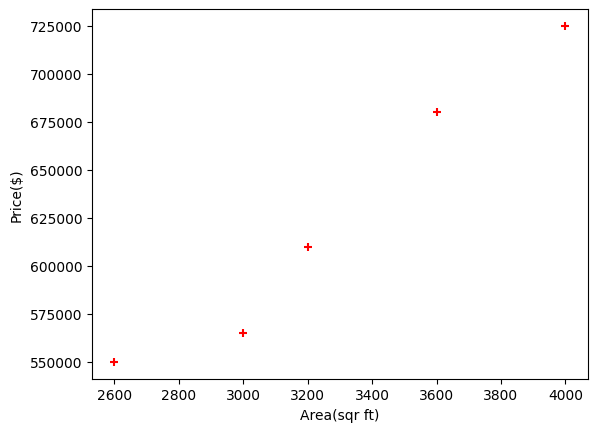

In [ ]:
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price($)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
lm=linear_model.LinearRegression()
lm.fit(df[['area']],df.price)  #Another way to pass a dataframe that only contains area which is required as first argument of the fxn
# Training the linear regression model using the avialabe datapoints

LinearRegression()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving area.csv to area.csv


In [ ]:
d=pd.read_csv("area.csv")

In [ ]:
# Now this linear regression model is ready to predict the prices
p=lm.predict(d)
#make sure to pass a 2d array or a dataframe here, otherwise it wont work

In [ ]:
d["predicted"]=p
d.to_csv("prediction.csv",index=False)

In [ ]:
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lm.intercept_
# intercept

180616.43835616432

In [ ]:
lm.coef_
# slope

array([135.78767123])

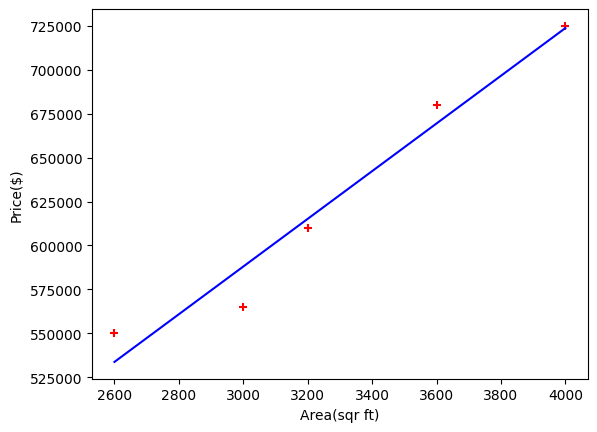

In [ ]:
plt.xlabel('Area(sqr ft)')
plt.ylabel('Price($)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,lm.predict(df[['area']]),color='blue')
#std line plot

                    LINEAR REGRESSION PRACTICE EXERCISE FROM CODEBASICS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving canada_per_capita_income.csv to canada_per_capita_income.csv


In [ ]:
df1=pd.read_csv("canada_per_capita_income.csv")

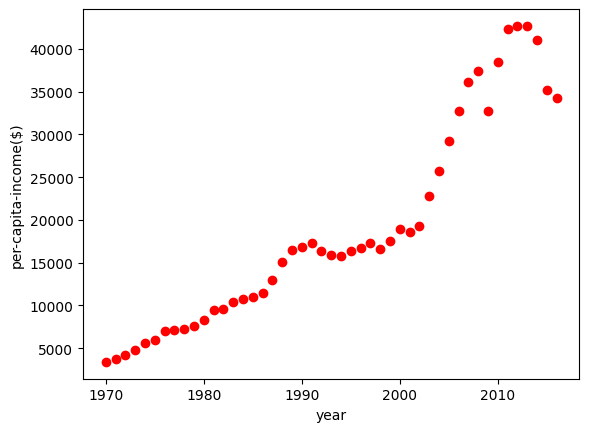

In [ ]:
plt.xlabel('year')
plt.ylabel('per-capita-income($)')
plt.scatter(df1.year,df1.percapitaincome,color='red',marker="o")

In [ ]:
lm=linear_model.LinearRegression()
lm.fit(df1[['year']],df1.percapitaincome)

LinearRegression()

In [ ]:
lm.predict([[2016]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37974.83379353])

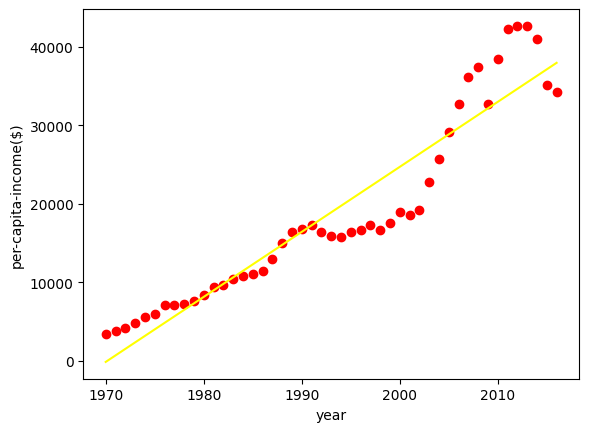

In [ ]:
plt.xlabel('year')
plt.ylabel('per-capita-income($)')
plt.scatter(df1.year,df1.percapitaincome,color='red',marker="o")
plt.plot(df1.year,lm.predict(df1[['year']]),color="yellow")

#NOTE -
Personally i wont recommend using linear regression for this dataset as the data aint linearly increasing

In [ ]:
# WEEK 4 -

# Multiple linear regression(MLR)

z=df[['horsepower','curb-weight','engine-size','highway-mpg']]
# Extractinng the 4 predictor independent variables and store them in z making a seperate dataframe out of em
lm.fit(z,df['price'])
# train the model as before
yhat=lm.predict(x)
#obtaining a prediction
# Here x is a an array/dataframe with 4 columnns,no. of rows depends on no. of samples
# And Output will also be an array/dataframe with same no. of elements as no. of samples but a single column is there

# Note- Use "!pip install <package_name>" o install any package that aint downloaded alr

          MULTIPLE LINEAR REGRESSION TUTORIAL FROM CODEBASICS

In [ ]:
#price = m1*area + m2*bedrooms + m3*age + b
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house.csv to house.csv


In [ ]:
df2=pd.read_csv("house.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
#         Data procesing
# We gotta handle this NaN value here
# Taking median of bedrooms column seems reasonable option here
import math
median_bedrooms=math.floor(df2.bedrooms.median())
median_bedrooms

3

In [ ]:
df2.bedrooms=df2.bedrooms.fillna(median_bedrooms)
# .fillna() function is used to fill missing (or NaN - Not a Number) values

In [ ]:
lm2=linear_model.LinearRegression()
lm2.fit(df2[["area","bedrooms","age"]],df2.price)

LinearRegression()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
d2=pd.read_csv("test.csv")

In [ ]:
d2['prices']=lm2.predict(d2)
d2

,area,bedrooms,age,prices
0,3000,3,40,444400.0
1,2500,4,5,588625.0


In [ ]:
d2.to_csv("prediction.csv")

In [ ]:
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lm2.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [ ]:
lm2.intercept_

383724.9999999998

                              MULTIPLE LINEAR REGRESSION CODEBASICS(EXERCISE)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving hiring.csv to hiring.csv


In [ ]:
df3=pd.read_csv("hiring.csv")
df3

,experience,test_scores(out of 10),interview_scores(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df3.dtypes


experience                      object
test_scores(out of 10)         float64
interview_scores(out of 10)      int64
salary($)                        int64
dtype: object

In [ ]:
'''df3['test_scores(out of 10)']=df3['test_scores(out of 10)'].astype('int')
df3.dtypes'''
#This wont work rn bcs there is NaN value in the column, gotta remove that  first
import math
median_marks=math.floor(df3['test_scores(out of 10)'].median())
df3['test_scores(out of 10)']=df3['test_scores(out of 10)'].fillna(median_marks)
df3

,experience,test_scores(out of 10),interview_scores(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=c7ae0c488ece051d905d7597974c2b3333a3fd3a362e52c1cac1b9d220ff9536
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
df3['experience']=df3['experience'].replace(np.NaN,'zero')
#another way - "d.experience = d.experience.fillna("zero")"
df3

,experience,test_scores(out of 10),interview_scores(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
from word2number import w2n
'''for i in range(len(df3['experience'])):
  df3['experience'[i]]=w2n.word_to_num(df3['experience'[i]])
df3'''
# Whats wrong here is that im accessing the charachtersc of string 'experience' instead of accessing each row of the column. to that the appropriate syntax is -

for i in range(len(df3['experience'])):
    df3.at[i, 'experience'] = w2n.word_to_num(df3['experience'][i])

#Another way - "d.experience = d.experience.apply(w2n.word_to_num)"

In [ ]:
df3

,experience,test_scores(out of 10),interview_scores(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
df3.dtypes

experience                      object
test_scores(out of 10)         float64
interview_scores(out of 10)      int64
salary($)                        int64
dtype: object

In [ ]:
df3['experience']=df3['experience'].astype('int')
df3['test_scores(out of 10)']=df3['test_scores(out of 10)'].astype('int')

In [ ]:
df3.dtypes


experience                     int64
test_scores(out of 10)         int64
interview_scores(out of 10)    int64
salary($)                      int64
dtype: object

In [ ]:
lm3=linear_model.LinearRegression()
lm3.fit(df3[["experience","test_scores(out of 10)","interview_scores(out of 10)"]],df3["salary($)"])

LinearRegression()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test2.csv to test2.csv


In [ ]:
d3=pd.read_csv("test2.csv")

In [ ]:
d3['prices']=lm3.predict(d3)
d3.to_csv("prediction2.csv")
files.download("prediction2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# WEEK 4

#Model evaluation using Visualisation

# Regression plot -
import seaborn as sns
sns.replot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

# Residual plot -
# Tells you if linear regression should be implemented on dataset or not
import seaborn as sns
sns.residplot(df["highway-mpg"],df["price"])

# Distribution plot -
# plot the counts of predicted vs actual value for a specific value of dependent variable
import seaborn as sns
ax1=distplot(df["price"],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)
# ax : This argument specifies the axes object on which the plot will be drawn. If not provided, Seaborn will create a new figure and axes automatically
# yhat : represents the predicted values

#                   POLYNOMIAL REGRESSION
# Check notes to check out very important theory

# Generating polonomial regression models -
f=np.polyfit(x,y,3)       # x,y are 1D arrays not df
# This line fits a polynomial of degree 3 (quadratic) to the data points (x, y). It calculates the coefficients of the polynomial that best fits the data using the method of least squares.  f will contain the coefficients of the polynomial, starting from the highest degree to the constant term.
p=np.poly1d(f)
# This line creates a polynomial object p using the coefficients f obtained from polyfit. The poly1d function constructs a one-dimensional polynomial class instance. This polynomial object p represents the polynomial function defined by the coefficients f
# np.poly1d is a class provided by NumPy that represents one-dimensional polynomials. When you call np.poly1d(f), you are creating an instance of the poly1d class. This instance (p in this case) represents a specific polynomial function.
# So, in summary, f contains the coefficients of the polynomial, and p represents the polynomial function that best fits the data based on those coefficients. You can use p to evaluate the polynomial function at different points or to perform other operations typical of polynomial functions.
print(p)
#this calculate the polynomial of third order
# To see how to plot a graph of polynomial regression, check notes of labs

# Polynomial regression with more the one variable -

# We cant use np.polyfit fxns for this type of fxns, we use "preprocessing" library in scikit-learn for this
# It creates a polynomial feature object that constructor takes the degree of the polynomial as a perameter. Then we transform the features/variables into a polynomial feature with the fit_transform method
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(x[["horsepower","curb-weight"]])
#What this transform method actually do is it takes the polynomial features(x1,x2) as parameters and convert them into new set of features like (x1,x2,x1*x2,(x1)^2,(x2)^2) and fit them in the constructor object pr which has called thwe object PolynomialFeatures with angument stating degree=2
lm=LinearRegression()
lm.fit(x_polly,df['price'])
y_pred=lm.predict(x_polly)

#                   PREPROCESSING

#We can normalise each feature simultaneously
from sklearn.preprocessing import StandardScaler
SCALE=StandardScsaler()
SCALE.fit(x_data[['horsepower','highway-mpg']])
x_scale=SCALE.transform(x_data[['horsepower','highway-mpg']])
# There are sm more normalisation methods in preprocessing library

#                   PIPELINE
# THis can be used to simplifying the multiple steps req to get the prediction(like normalisation,polynomial transform, linear regression) into single pipeline
# Making a pipeline-
from sklearn.preprocessing import PolynomialFeatures #for poly ofc
from sklearn.linear_model import LinearRegression #for linear reg ofc
from sklearn.preprocessing import StandardScaler #for normalisation

from sklearn.pipeline import Pipeline
# import pipeline library

input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
# Basically we created a list of tuples containing first element as name of the estimator/model and secound element as model constructor

pipe=Pipeline(Input)
# Here we input the list in the pipeline constructor. now we hv a pipeline object named 'pipe'
pipe.fit(df[['horsepower','curb-weight','engine-size','highway-mpg']],df['price'])
# We can now train the pipeline by applying train/fit method in pipe object
yhat=pipe.predict(df[['horsepower','curb-weight','engine-size','highway-mpg']])
# To predict


#                   MEASURES FOR IN SAMPLE EVALUATION
# To numerically evaluate our models(we've done it through visuallisation till now)
# 2 measures -
#             Mean squared Error(MSE)
#             r-sqared

# MSE -
from sklearn.metrics import mean_squared_error
mean_squared_error(df['price'],Y_predict_simple_fit)
# Two arguments passed in this fxn r actual values of y/prices and predicted value of prices

# R^2 -
# See notes for detailed explaination
x=df[['hif=ghway-mpg']]
y=df['price']
lm.fit(x,y)
lm.score(x,y)
# result: 0.49659118
# If we get output smthing like "0.49659118", it means that 49.65% variation in the price is explained by this simple linear model
# R^2 value is usually between 0 and 1
# If R^2 is in -ve, it could be bcs of "overfitting".
import numpy as np
new_input=np.array(1,100,1).reshape(1,-1)
# this will create an array containing numbers from 1 to 100
# .reshape(-1, 1)   :   This transforms the 1-dimensional array into a 2-dimensional array with one column and as many rows as needed to accommodate all the elements (in this case, 99 rows)
                      # The reshape method is used to change the shape of the array.
                      # -1 is a placeholder that automatically calculates the appropriate number of rows to maintain the total number of elements. It means "infer this dimension based on the other given dimensions".
                      # 1 specifies that the reshaped array should have 1 column.
yhat=lm.predict(new_input)
# We can make the prediction for these values and observe that few of the results are -ve
# For multiple linear regression -
# Rsult: 0.8093562806577457

# For plynomial fxn-
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
# Result: 0.67419

# For multi variable Polynomial fxn -
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(df[["horsepower","curb-weight"]])
lm=LinearRegression()
lm.fit(x_polly,df['price'])
lm.score(x_polly,df['price'])
# result: 0.8102610127370437

#                     Labs -

# yhat[0:5] can be used to display limted result of the predicted array

#                     Plotting pollynomial regression plot -
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    # This creates a new array x_new with 100 points evenly spaced between 15 and 55. These values will be used for plotting the fitted polynomial, 15 is taken after assessing the smallest value of highway-mpg(14) and 55 is taken after assessing the largest (54)
    y_new = model(x_new)    # Since we are using polynomial fxn , no neeed for passing 2D array, 1D is enough
    # This line calculates the predicted values y_new using the fitted model 'model' (presumably a polynomial regression model) with the values in x_new
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    # This line plots the original data points using '.' markers and connects them with lines representing the fitted polynomial using '-' markers.
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    # This gets the current Axes instance, After retrieving the current axes, further modifications can be made to it. In this case, the background color of the axes is set to a light grayish color using:
    ax.set_facecolor((0.898, 0.898, 0.898))
    # This sets the background color of the plot to a light grayish color
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    # For plots made from matplotlib using plt, its necessary to run show fxn and close fxn
    plt.close()

x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
print(f)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')
# p is the model that is being passed

# TO convert a 1D array to 2D array/df so that it can be used to predit
x_new=np.linspace(15,55,100)
y_new=lm.predict(x_new[:,np.newaxis])

# Making 2D array using np
new_input=np.arange(1, 100, 1).reshape(-1, 1)




In [ ]:
#                                     WEEEK 5

# Training/Testing dataset

#To assess the performance of the predictive model for a new set of data we can just split our dataset into training (to train the model)(70%) and testing(to assess)(30%) set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
# x_data = features or indipendent variables
# y_data = dataset targetted: df['price']
# random_state = number generator used for random sampling
# x_trian,y_train = parts of available data  for training as an array
# x_test,y_test = parts of avialabe data for testing as an array
# test_size = percentage of the data for testing set(here 30%)
# random_state = number generator used for random sampling

#           Generalisation Performance -
# Check notes for detailed theory

#           Cross Evaluation -
# Check notes for detailed and important theory
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,x_data,y_data,cv=3)
# cross_val_score() performs multiple out-of-sample evaluation
# lr represents linear regression model, which is used as the model that we r using to do the cross validation
# x_data = predictor variable data        y_data = targeted variable data
# cv manages the no. of parameters, here dataset is divided into 3 equal partitions
# This fxns returns an array of scores, one for each partition that was chosen as the testing set.Each score is basically the R^2 values for that case
np.mean(scores)
# We can average the result together to estimate out-of-sample R^2 using the mean fxn in numpy

# kFold and StratifiedkFold from model selection can also be used

#     Cross_val_predict fxn-
# Gives yhat for each case
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lr2e,x_data,y_data,cv=3)
# same input as of score, but output is a prediction

#             Model Selection-
# Check notes for theory part(IMP)
Rsqu_test=[]
order=[1,2,3,4]
lr=LinearRegression()
for n in order:
  pr=PolynomialFeatures(degree=n)
  x_trian_pr=pr.fit_transform(x_train[['horsepower']])
  x_test_pr=pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr,y_train)
  Rsqu_test.append(lr.score(x_test_pr,y_test))

#             Ridge Regression -
# Used to prevent overfiting of the data
# Read notes for detailed discription

#   Hyperperameter alpha -

#   To select perfect alpha , We use cross validation .

# Firstly, To make a prediction using Ridge regression -
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(X,y)
yhat=RidgeModel.predict(X)

# Predicting alpha for ridge regression -
# This is done using Grid search

#   Hyperparametrs -
# Notes

#             Grid Search -
# Used to estimate perfect hyperparameter alpha to be used to get best ridge regression(which avoid underfitting and overfitting)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameter1= [{'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000]}]
# Its a dictionary containing all the possible values of alpha
RR=Ridge()


                                          CODEBASICS KFOLD CrossValidation
                                          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)

In [ ]:
def get_score(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)


In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
# It is similar to kfold but better in the way that when you are seprating out the folds, it will dic=vide each of the classification categories in a unoform way(eg- each type of flower is distributed among all folds uniformly)
fold=StratifiedGroupKFold(n_splits=3)


In [ ]:
scores_lr=[]
scores_svm=[]
scores_rf=[]
for train_index,test_index in kf.split(digits.data):
  x_test,x_train,y_test,y_train=digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
  scores_lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
  scores_svm.append(get_score(SVC(),x_train,x_test,y_train,y_test))
  scores_rf.append(get_score(RandomForestClassifier(n_estimators=60),x_train,x_test,y_train,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
scores_lr

[0.9290484140233722, 0.8914858096828047, 0.8689482470784641]

In [ ]:
scores_svm

[0.9499165275459098, 0.9223706176961602, 0.9265442404006677]

In [ ]:
scores_rf

[0.9207011686143572, 0.8856427378964942, 0.8923205342237062]

In [ ]:
# Corss_val_score does the same thing we did through the loop
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),digits.data,digits.target,cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.92153589, 0.94156928, 0.91652755])